In [26]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurations pour de meilleurs graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)



In [12]:
!pip install kaggle


In [14]:
# Remplacer par le chemin correct pour ton dossier data
!kaggle datasets download -d adityakadiwal/water-potability -p ../data --unzip


Dataset URL: https://www.kaggle.com/datasets/adityakadiwal/water-potability
License(s): CC0-1.0




  0%|          | 0.00/251k [00:00<?, ?B/s]
100%|##########| 251k/251k [00:00<00:00, 124MB/s]


In [15]:
import pandas as pd

df = pd.read_csv("../data/water_potability.csv")
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [16]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("../data/water_potability.csv")

# Voir combien de NaN par colonne
print(df.isnull().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [17]:
# Remplacer les NaN par la moyenne de chaque colonne
df.fillna(df.mean(), inplace=True)

# Vérifier que tout est correct
print(df.isnull().sum())


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [18]:
# -------------------------------
# Prétraitement complet du dataset
# -------------------------------

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger le dataset
df = pd.read_csv("../data/water_potability.csv")

# 1️⃣ Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne :\n", df.isnull().sum())

# 2️⃣ Imputation
# Moyenne pour 'ph'
df['ph'].fillna(df['ph'].mean(), inplace=True)

# Médiane pour 'Sulfate' et 'Trihalomethanes'
for col in ['Sulfate', 'Trihalomethanes']:
    df[col].fillna(df[col].median(), inplace=True)

# Vérification
print("\nAprès imputation :\n", df.isnull().sum())

# 3️⃣ Séparer features et target
X = df.drop('Potability', axis=1)
y = df['Potability']

# 4️⃣ Standardisation des features (important pour SVM, KNN, KMeans)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 5️⃣ DataFrame final prêt pour ML
df_clean = pd.concat([X_scaled, y], axis=1)

print("\nAperçu des données préparées :")
df_clean.head()


Valeurs manquantes par colonne :
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Après imputation :
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Aperçu des données préparées :


C:\Users\OMEN\AppData\Local\Temp\ipykernel_5300\1872898974.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(), inplace=True)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_5300\1872898974.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0
2,6.928678e-01,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0
3,8.409504e-01,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset propre
df = df_clean.copy()  # df_clean vient de la cellule précédente (après imputation et standardisation)


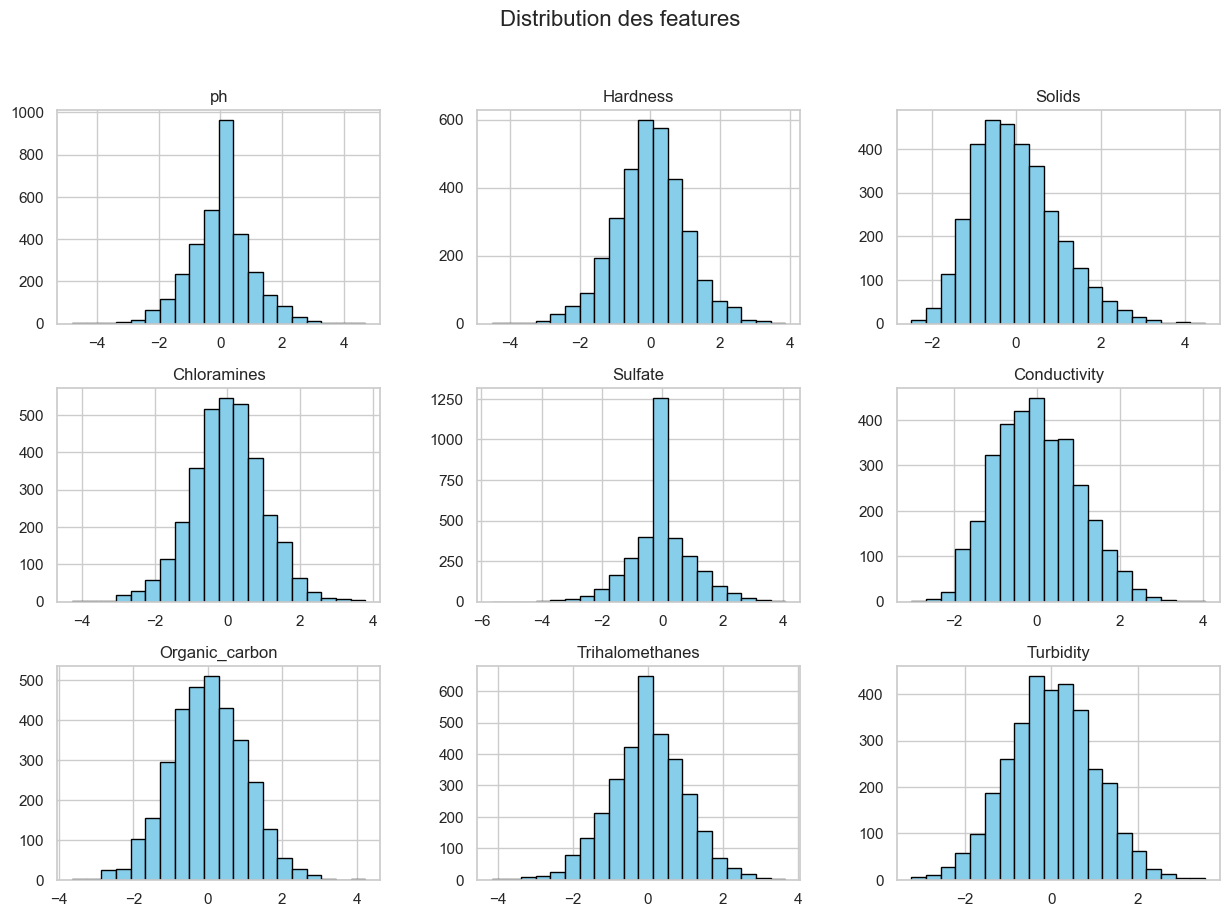

In [20]:
# Créer des histogrammes pour chaque colonne
df_features = df.drop(['Potability', 'Cluster'], axis=1, errors='ignore')  # enlever la target et cluster si existant

df_features.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des features", fontsize=16)
plt.show()


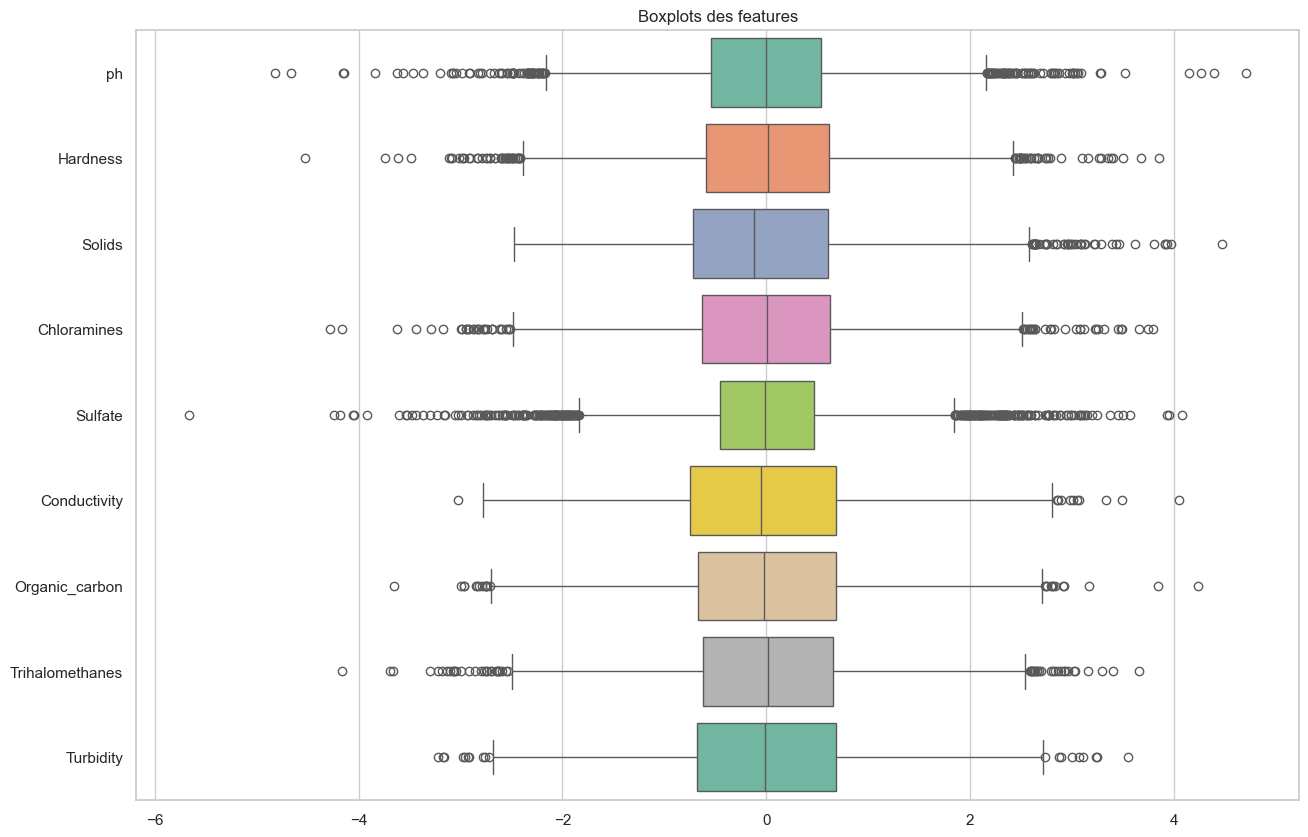

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_features, orient='h', palette='Set2')
plt.title("Boxplots des features")
plt.show()


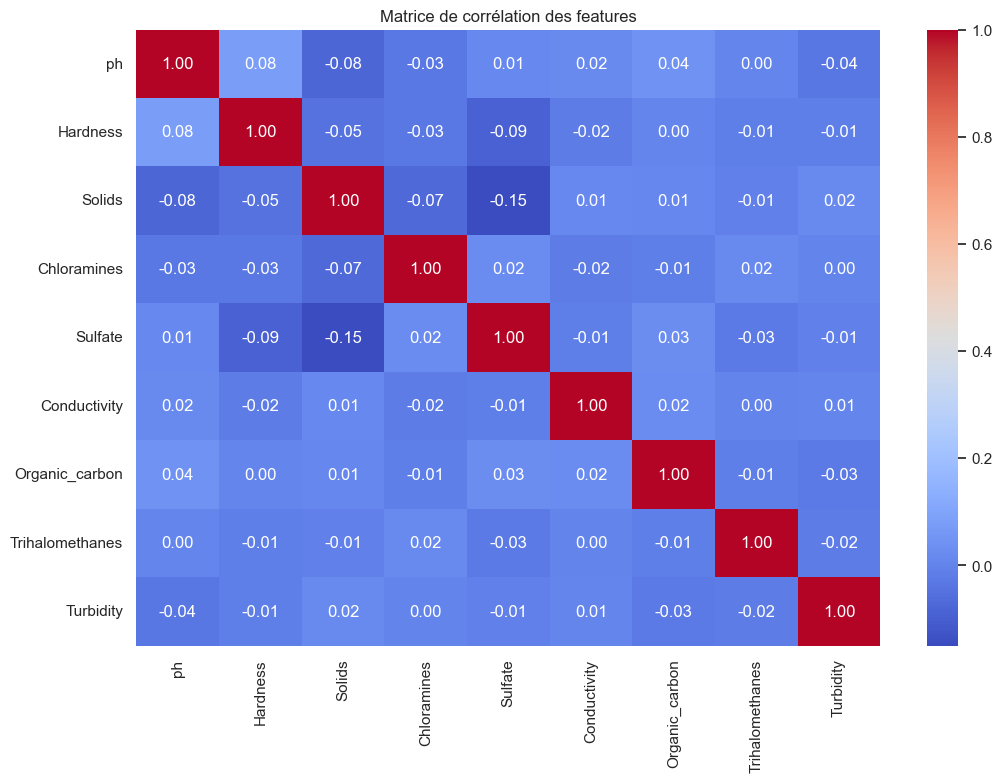

In [22]:
plt.figure(figsize=(12,8))
corr = df_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des features")
plt.show()


C:\Users\OMEN\AppData\Local\Temp\ipykernel_5300\1701689641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='pastel')


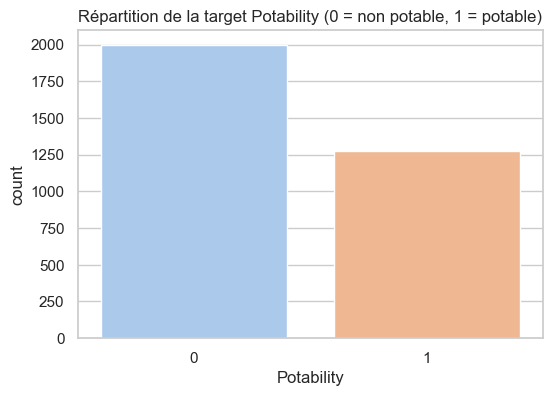

Pourcentage de chaque classe :
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Potability', data=df, palette='pastel')
plt.title("Répartition de la target Potability (0 = non potable, 1 = potable)")
plt.show()

print("Pourcentage de chaque classe :")
print(df['Potability'].value_counts(normalize=True)*100)


In [25]:
if 'Cluster' in df.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df_features['pH'], df_features['Sulfate'], c=df['Cluster'], cmap='viridis', alpha=0.6)
    plt.xlabel("pH")
    plt.ylabel("Sulfate")
    plt.title("Visualisation des clusters et anomalies potentielles")
    plt.show()
